In [1]:
import numpy as np
import extq
import matplotlib.pyplot as plt
from matplotlib import ticker
import pyemma
import glob
import sys
import importlib
import gc
import sklearn
from sklearn import metrics
import ivac
import seaborn as sns

ImportError: cannot import name 'backward_committor' from 'extq.memory._dga' (/project2/dinner/scguo/extq/src/extq/memory/_dga.py)

In [5]:
sys.path.insert(1, "../../python")
sys.path.insert(1, "../../..")
import util
import plotting
import kde

NameError: name 'sys' is not defined

In [ ]:
plt.style.use("seaborn-ticks")
sns.set_palette("colorblind")

# Load data

In [ ]:
cv_trajs = list(
    np.load("../../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True)
)
cv_trajs.extend(
    np.load("../../data/raw_feat/cv_dist_spin_suppl_00.npy", allow_pickle=True)
)
cv_trajs.extend(
    np.load("../../data/raw_feat/cv_dist_spin_suppl_01.npy", allow_pickle=True)
)

In [ ]:
sb_labels = []
for r in ("R217", "R223", "R226", "R229", "R232"):
    for n in ("D129", "D136", "D151", "D164", "E183", "D186"):
        sb_labels.append(f"{r} - {n}")

In [ ]:
sb_trajs = list(np.load("../../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True))
for i in range(5):
    sb_trajs.extend(
        np.load(f"../../data/raw_feat/feat2_suppl_{i:02d}.npy", allow_pickle=True)
    )

In [ ]:
cv_arr = np.concatenate(cv_trajs)
sb_arr = np.concatenate(sb_trajs)
print(cv_arr.shape, sb_arr.shape)

In [ ]:
traj_files = np.loadtxt("../../data/suppl_traj_files.txt", dtype=str)

# IVAC

In [13]:
remove = [
    1282,
    1283,
    1284,
    1285,
    1286,
    1288,
    1289,
    1290,
    1187,
    1188,
    1189,
    1190,
    1191,
    1197,
    1198,
    1199,
    1203,
    1205,
    1206,
    1207,
    1211,
    1212,
    1213,
    1214,
    1215,
    1225,
    1226,
    1227,
    1228,
    1231,
    1232,
    1233,
    1236,
    1237,
    1238,
    1242,
    1245,
    1246,
    1252,
    1253,
    1260,
    1261,
    1262,
    1263,
    1266,
    1267,
    1268,
    1269,
    1270,
    1271,
    1272,
    1273,
    1274,
    1275,
    1276,
    1277,
    1278,
    1279,
]

In [14]:
# load feature 5
with np.load("../../data/raw_feat/feat5_raw.npz", allow_pickle=True) as f:
    feat5_trajs = f["arr_0"]
feat5_trajs = list(feat5_trajs)
for idx in sorted(remove, reverse=True):
    del feat5_trajs[idx]
np.savez_compressed("../../data/raw_feat/feat5_raw.npz", feat5_trajs[1000:])

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [22]:
with np.load("../../data/raw_feat/feat5_raw.npz", allow_pickle=True) as f:
    feat5_trajs = f["arr_0"]

In [23]:
feat5_trajs[0].shape

(10000, 1924)

In [25]:
feat5_trajs = list(feat5_trajs)
with np.load("../../data/raw_feat/feat5_suppl_00.npz") as f:
    feat5_trajs.extend(f["arr_0"])
with np.load("../../data/raw_feat/feat5_suppl_01.npz") as f:
    feat5_trajs.extend(f["arr_0"])

In [26]:
feat5_trajs[-1].shape

(3000, 1924)

In [27]:
print(len(feat5_trajs))

438


In [28]:
livac = ivac.LinearIVAC(minlag=1, maxlag=10000, nevecs=10, reweight=False)
livac.fit(feat5_trajs)
ivac_trajs = livac.transform(feat5_trajs)
ivac_arr = np.concatenate(ivac_trajs)
print(ivac_arr.shape)

(3603000, 10)


## Plot some stuff

In [29]:
np.save("../../data/raw_feat/feat5_ivac_suppl.npy", ivac_trajs)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


Text(0, 0.5, 'Implied timescales ($\\mu$s)')

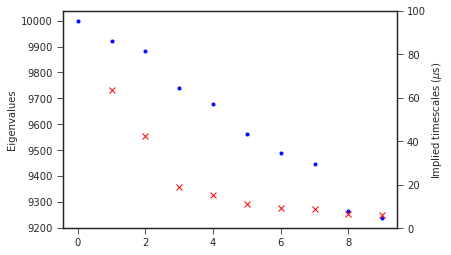

In [30]:
plt.plot(livac.evals[:10], ".", color="blue")
plt.ylabel("Eigenvalues")
plt.twinx()
plt.plot(livac.its[:10] * 0.0001, "x", color="red")
plt.ylim([0, 100])
plt.ylabel("Implied timescales ($\mu$s)")

In [31]:
import random

random.seed(123)

[None]

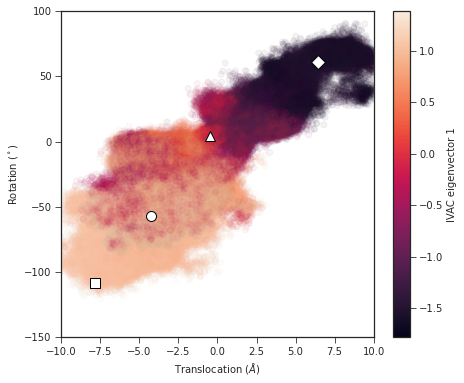

In [33]:
s = 10
N = len(ivac_arr)
inds = random.sample(range(N), N // s)

f, ax = plt.subplots(figsize=(7, 6))
h = ax.scatter(
    cv_arr[inds, 0], cv_arr[inds, 1], c=ivac_arr[inds, 1], cmap="rocket", alpha=0.05
)
plotting.format_cvs(ax, centroids=True)
cb = plt.colorbar(h, ax=ax, label="IVAC eigenvector 1")
cb.solids.set(alpha=1)

[None]

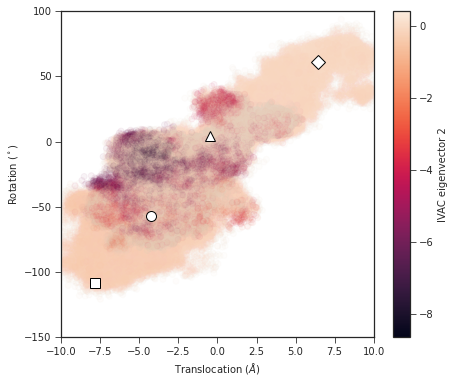

In [34]:
s = 10
N = len(ivac_arr)
inds = random.sample(range(N), N // s)

f, ax = plt.subplots(figsize=(7, 6))
h = ax.scatter(
    cv_arr[inds, 0], cv_arr[inds, 1], c=ivac_arr[inds, 2], cmap="rocket", alpha=0.05
)
plotting.format_cvs(ax, centroids=True)
cb = plt.colorbar(h, ax=ax, label="IVAC eigenvector 2")
cb.solids.set(alpha=1)

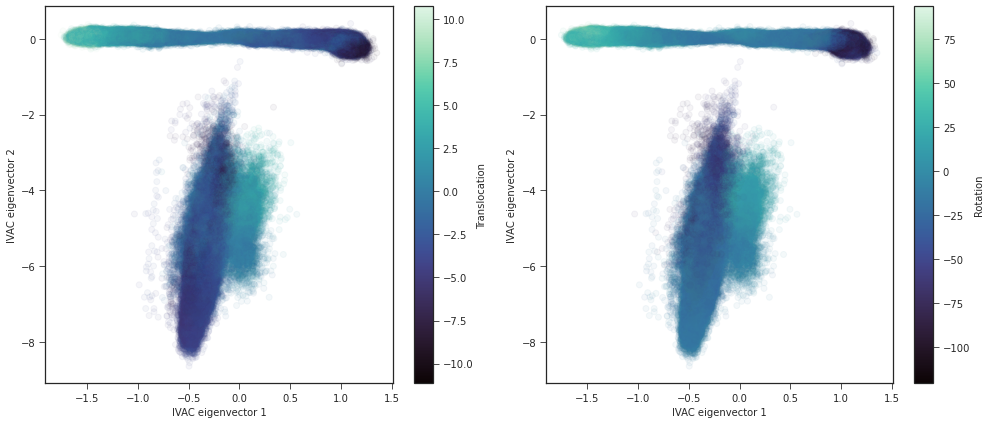

In [35]:
# project onto IVAC eigenvectors
f, axes = plt.subplots(1, 2, figsize=(14, 6))
labels = ("Translocation", "Rotation")

for i, ax in enumerate(axes):
    h0 = ax.scatter(
        ivac_arr[inds, 1], ivac_arr[inds, 2], c=cv_arr[inds, i], alpha=0.05, cmap="mako"
    )
    cbar = plt.colorbar(h0, ax=ax, label=labels[i])
    cbar.solids.set(alpha=1)
    ax.set(xlabel="IVAC eigenvector 1", ylabel="IVAC eigenvector 2")

f.tight_layout()

# Distance basis

In [36]:
dist = cv_arr[:, 0]
rot = cv_arr[:, 1]
# tic1 = livac_arr[:, 1]
# tic2 = livac_arr[:, 2]
sb1 = sb_arr[:, 42]  # R226-D129
sb2 = sb_arr[:, 47]  # R226-D186
sb3 = sb_arr[:, 48]  # R229-D129
sb4 = sb_arr[:, 53]  # R229-D186
sb5 = sb_arr[:, 59]  # R232-D186


# ellipse centered at down centroid with radii 1.1 nm and 8 deg (1 sigma in each direction)
# take points where R2-D186 < 0.5 (lower salt bridges), R2-D129 > 0.6 (upper salt bridge)
dist_ax_down = (dist + 4.240) / 1.1
rot_ax_down = (rot + 56.95) / 8
down_ids = (
    ((dist_ax_down ** 2 + rot_ax_down ** 2) < 1) & (sb1 > 0.6) & (sb2 < 0.5)
).nonzero()[0]

# ellipse centered at up centroid with radii 0.84 nm and 7.6 deg (2 sigma in each direction)
# take points where R2-D129 (up) < 0.5, R3-D129 < 1.1, R3/R4-D186 salt bridges < 0.75/0.6 nm
up_ids = (
    ((((dist + 0.506) / 0.84) ** 2 + ((rot - 3.94) / 7.6) ** 2) < 1)
    & (sb1 < 0.5)
    & (sb3 < 1.1)
    & (sb4 < 0.75)
    & (sb5 < 0.6)
).nonzero()[0]

In [40]:
mask = np.ones(len(cv_arr), dtype=bool)
mask[down_ids] = False
mask[up_ids] = False

# len(**_ids) is number of points in each state
down = sb_arr[down_ids]
up = sb_arr[up_ids]
other = sb_arr[mask]

# split CV data
down_cvs = cv_arr[down_ids]
up_cvs = cv_arr[up_ids]
other_cvs = cv_arr[mask]
down_sbs = sb_arr[down_ids]
up_sbs = sb_arr[up_ids]
other_sbs = cv_arr[mask]

In [38]:
assert (len(down_ids) + len(up_ids) + len(other_sbs)) == len(cv_arr)
print(f"Number of down structures:  {len(down_ids)}")
print(f"Number of up structures:   {len(up_ids)}")
print(f"Number of other structures: {len(other_sbs)}")

Number of down structures:  35280
Number of up structures:   6649
Number of other structures: 3561071


## compute distance to states

In [39]:
# compute minimum distance (minimum of column) from domain to dimeric/monomeric state
def reduce_func(D_chunk, start):
    min2 = np.min(D_chunk, axis=1)
    return min2

In [42]:
d_down = []
counter = 0.0
tot = len(sb_arr)
skip = 3

for chunk in metrics.pairwise_distances_chunked(
    sb_arr, down[::skip], n_jobs=-1, reduce_func=reduce_func
):
    d_down.append(chunk)
    counter += float(len(chunk))
    perc = counter / tot * 100
    print(f"{perc:.2f}% completed")

0.32% completed
0.63% completed
0.95% completed
1.27% completed
1.58% completed
1.90% completed
2.22% completed
2.53% completed
2.85% completed
3.17% completed
3.48% completed
3.80% completed
4.12% completed
4.43% completed
4.75% completed
5.07% completed
5.38% completed
5.70% completed
6.02% completed
6.34% completed
6.65% completed
6.97% completed
7.29% completed
7.60% completed
7.92% completed
8.24% completed
8.55% completed
8.87% completed
9.19% completed
9.50% completed
9.82% completed
10.14% completed
10.45% completed
10.77% completed
11.09% completed
11.40% completed
11.72% completed
12.04% completed
12.35% completed
12.67% completed
12.99% completed
13.30% completed
13.62% completed
13.94% completed
14.25% completed
14.57% completed
14.89% completed
15.20% completed
15.52% completed
15.84% completed
16.15% completed
16.47% completed
16.79% completed
17.11% completed
17.42% completed
17.74% completed
18.06% completed
18.37% completed
18.69% completed
19.01% completed
19.32% comp

In [43]:
# Set all distances of point in down state to be 0 explicitly
d_down_arr = np.reshape(np.concatenate(d_down), (-1, 1))
d_down_arr[down_ids] = 0

print(d_down_arr.shape)

(3603000, 1)


In [44]:
np.save("../../data/feat2_dist_du_suppl/dist_down", d_down_arr)

In [45]:
d_up = []
counter = 0.0
skip = 3

for chunk in metrics.pairwise_distances_chunked(
    sb_arr, up[::skip], n_jobs=20, reduce_func=reduce_func
):
    d_up.append(chunk)
    counter += float(len(chunk))
    perc = counter / tot * 100
    print(f"{perc:.2f}% completed")

1.68% completed
3.36% completed
5.04% completed
6.72% completed
8.40% completed
10.08% completed
11.76% completed
13.44% completed
15.12% completed
16.80% completed
18.48% completed
20.16% completed
21.84% completed
23.52% completed
25.20% completed
26.88% completed
28.56% completed
30.24% completed
31.93% completed
33.61% completed
35.29% completed
36.97% completed
38.65% completed
40.33% completed
42.01% completed
43.69% completed
45.37% completed
47.05% completed
48.73% completed
50.41% completed
52.09% completed
53.77% completed
55.45% completed
57.13% completed
58.81% completed
60.49% completed
62.17% completed
63.85% completed
65.53% completed
67.21% completed
68.89% completed
70.57% completed
72.25% completed
73.93% completed
75.61% completed
77.29% completed
78.97% completed
80.65% completed
82.33% completed
84.01% completed
85.69% completed
87.37% completed
89.05% completed
90.73% completed
92.41% completed
94.09% completed
95.78% completed
97.46% completed
99.14% completed
10

In [46]:
# Set all distances of point in up state to be 0 explicitly
d_up_arr = np.reshape(np.concatenate(d_up), (-1, 1))
d_up_arr[up_ids] = 0

print(d_up_arr.shape)

(3603000, 1)


In [47]:
np.save("../../data/feat2_dist_du_suppl/dist_up", d_up_arr)

## Basis and smoothing

In [49]:
# make smoothing function
smooth = (d_down_arr * d_up_arr) ** 0.5 / (d_down_arr + d_up_arr)

# make guess
guess_down = (d_up_arr ** 2) / (d_down_arr ** 2 + d_up_arr ** 2)
guess_up = (d_down_arr ** 2) / (d_down_arr ** 2 + d_up_arr ** 2)

# make smoothing 0 at boundaries (down and up states)
smooth[(mask == 0).flatten()] = 0
# ensure homogeneous boundary conditions for guess
guess_up[up_ids] = 1
guess_up[down_ids] = 0
guess_down[down_ids] = 1
guess_down[up_ids] = 0

In [50]:
print(smooth.shape, guess_down.shape, guess_up.shape)

(3603000, 1) (3603000, 1) (3603000, 1)


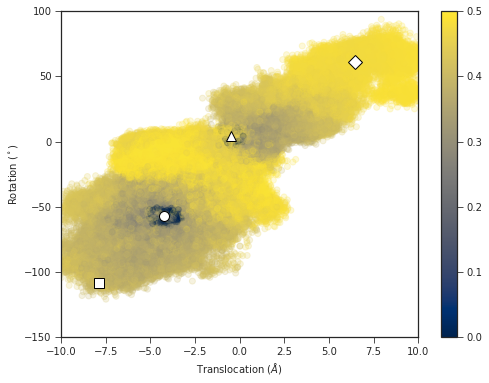

In [51]:
# Plot smoothing function
fig, ax = plt.subplots(figsize=(8, 6))
h = ax.scatter(
    cv_arr[inds, 0], cv_arr[inds, 1], c=smooth[inds], alpha=0.2, cmap="cividis"
)
cb = plt.colorbar(h, ax=ax)
cb.solids.set(alpha=1.0)
plotting.format_cvs(ax)

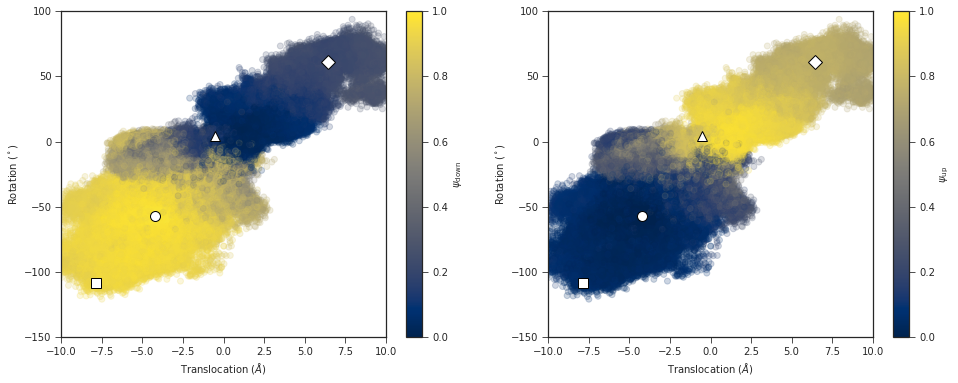

In [54]:
# Plot down and up state guess function
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
labels = ("$\psi_{\mathrm{down}}$", "$\psi_{\mathrm{up}}$")
for ax, g, label in zip(axs, (guess_down, guess_up), labels):
    h = ax.scatter(
        cv_arr[inds, 0], cv_arr[inds, 1], c=g[inds], alpha=0.2, cmap="cividis"
    )
    cb = plt.colorbar(h, ax=ax, label=label)
    cb.solids.set(alpha=1.0)
    plotting.format_cvs(ax)

In [56]:
basis_smooth = smooth * sb_arr
print(basis_smooth.shape)
basis_white, L = util.svd_whiten(basis_smooth, 1, frac_retain=0.9999)
basis_white[(mask == 0).flatten()] = 0
print(basis_white.shape)

(3603000, 60)
(3603000, 59)


Text(0.5, 1.0, 'Smoothed and orthorgonalized basis')

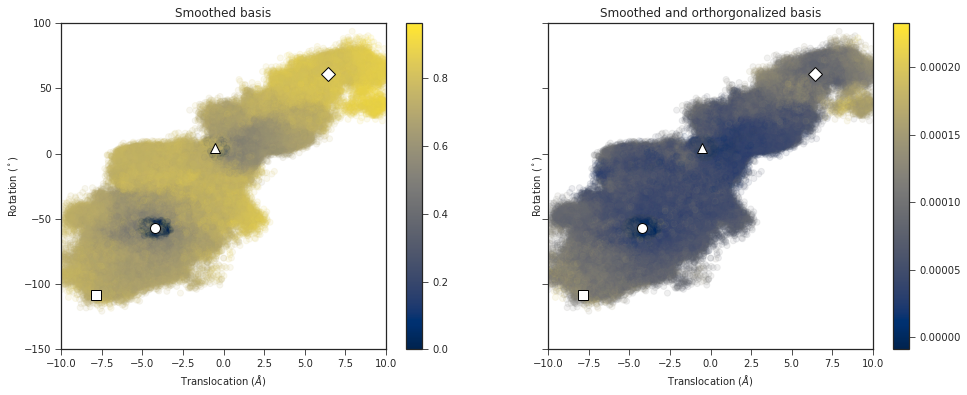

In [60]:
# plot bases
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
h1 = ax1.scatter(
    cv_arr[inds, 0],
    cv_arr[inds, 1],
    c=np.mean(basis_smooth[inds, :], axis=1),
    alpha=0.1,
    cmap="cividis",
)
h2 = ax2.scatter(
    cv_arr[inds, 0],
    cv_arr[inds, 1],
    c=np.mean(basis_white[inds, :], axis=1),
    alpha=0.1,
    cmap="cividis",
)
for h, ax in zip((h1, h2), (ax1, ax2)):
    plotting.format_cvs(ax)
    cb = plt.colorbar(h, ax=ax)
    cb.solids.set(alpha=1)
ax1.set_title("Smoothed basis")
ax2.set_title("Smoothed and orthorgonalized basis")

# Change of measure (indicator basis)

In [61]:
# cluster IVAC points with K-means
km = pyemma.coordinates.cluster_mini_batch_kmeans(
    data=ivac_arr, k=1000, max_iter=100, n_jobs=40
)

13-10-21 12:10:00 pyemma.coordinates.clustering.kmeans.MiniBatchKmeansClustering[0] INFO     Cluster centers converged after 2 steps.


In [62]:
dtrajs = km.dtrajs[0]

In [63]:
np.save("../../data/raw_feat/feat5_ivac_ind1000_suppl_01", dtrajs)

In [64]:
import importlib

importlib.reload(util)

<module 'util' from '../../python/util.py'>

In [67]:
# split into lists of arrays
traj_inds = util.split_indices(cv_trajs)

basisL_arr = util.make_sparse_basis(dtrajs)

traj_lens = [len(traj) for traj in cv_trajs]
basisL = []
curr = 0
for t_len in traj_lens:
    basisL.append(basisL_arr[curr : curr + t_len])
    curr += t_len

basisF = np.split(basis_white, traj_inds)
guessU = np.split(np.squeeze(guess_up), traj_inds)
guessD = np.split(np.squeeze(guess_down), traj_inds)

print(len(basisL), basisL[0].shape)
print(len(basisF), basisF[0].shape)
print(len(guessU))
print(len(guessD))

438 (10000, 1000)
438 (10000, 59)
438
438


In [68]:
lags = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]

In [69]:
weights = []
for lag in lags:
    weights.append(extq.dga.reweight_sparse(basisL, lag))

In [70]:
np.save("../../data/com_feat5_ind1000_suppl_01", weights, allow_pickle=True)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [3]:
weights = np.load("../../data/com_feat5_ind1000_suppl_01.npy", allow_pickle=True)

# PMF

In [4]:
# PMFs
dist_trajs = [traj[:, 0] for traj in cv_trajs]
rot_trajs = [traj[:, 1] for traj in cv_trajs]
xlim = np.linspace(-10, 10, 50)
ylim = np.linspace(-150, 100, 50)

NameError: name 'cv_trajs' is not defined

In [72]:
pmf = extq.projection.density2d(dist_trajs, rot_trajs, weights[0], xlim, ylim)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


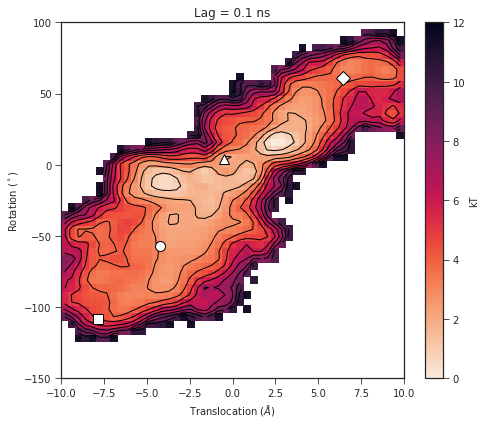

In [74]:
clines = np.linspace(0, 12, 13)
centerx = (xlim[1:] + xlim[:-1]) / 2
centery = (ylim[1:] + ylim[:-1]) / 2

f, ax = plt.subplots(figsize=(7, 6))

# calculate energy difference against minimum
min_energy = np.min(-np.log(pmf[np.nonzero(pmf)]))
diff = -np.log(pmf.T) - min_energy
h = ax.pcolor(xlim, ylim, diff, cmap="rocket_r", vmax=12, label="kT")
plt.colorbar(h, ax=ax, label="kT")
ax.contour(
    centerx,
    centery,
    diff,
    levels=clines,
    colors="black",
    linestyles="solid",
    linewidths=1,
)
ax.set_title(f"Lag = 0.1 ns")
plotting.format_cvs(ax, centroids=True)
f.tight_layout()

# Committors

In [75]:
in_domain = np.split(mask, traj_inds)
in_domain[0].shape

(10000,)

In [76]:
len(in_domain)

438

In [77]:
q_downup, qb_downup = [], []
for (lag, com) in zip(lags, weights):
    print(f"Calculating committors for lag {lag}")
    q_downup.append(extq.dga.forward_committor(basisF, com, in_domain, guessU, lag))
    qb_downup.append(extq.dga.backward_committor(basisF, com, in_domain, guessD, lag))

Calculating committors for lag 1
Calculating committors for lag 5
Calculating committors for lag 10
Calculating committors for lag 20
Calculating committors for lag 50
Calculating committors for lag 100
Calculating committors for lag 200
Calculating committors for lag 500
Calculating committors for lag 1000
Calculating committors for lag 2000


In [78]:
np.save("../../data/feat2_dist_du_suppl/q_downup", q_downup)
np.save("../../data/feat2_dist_du_suppl/qb_downup", qb_downup)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


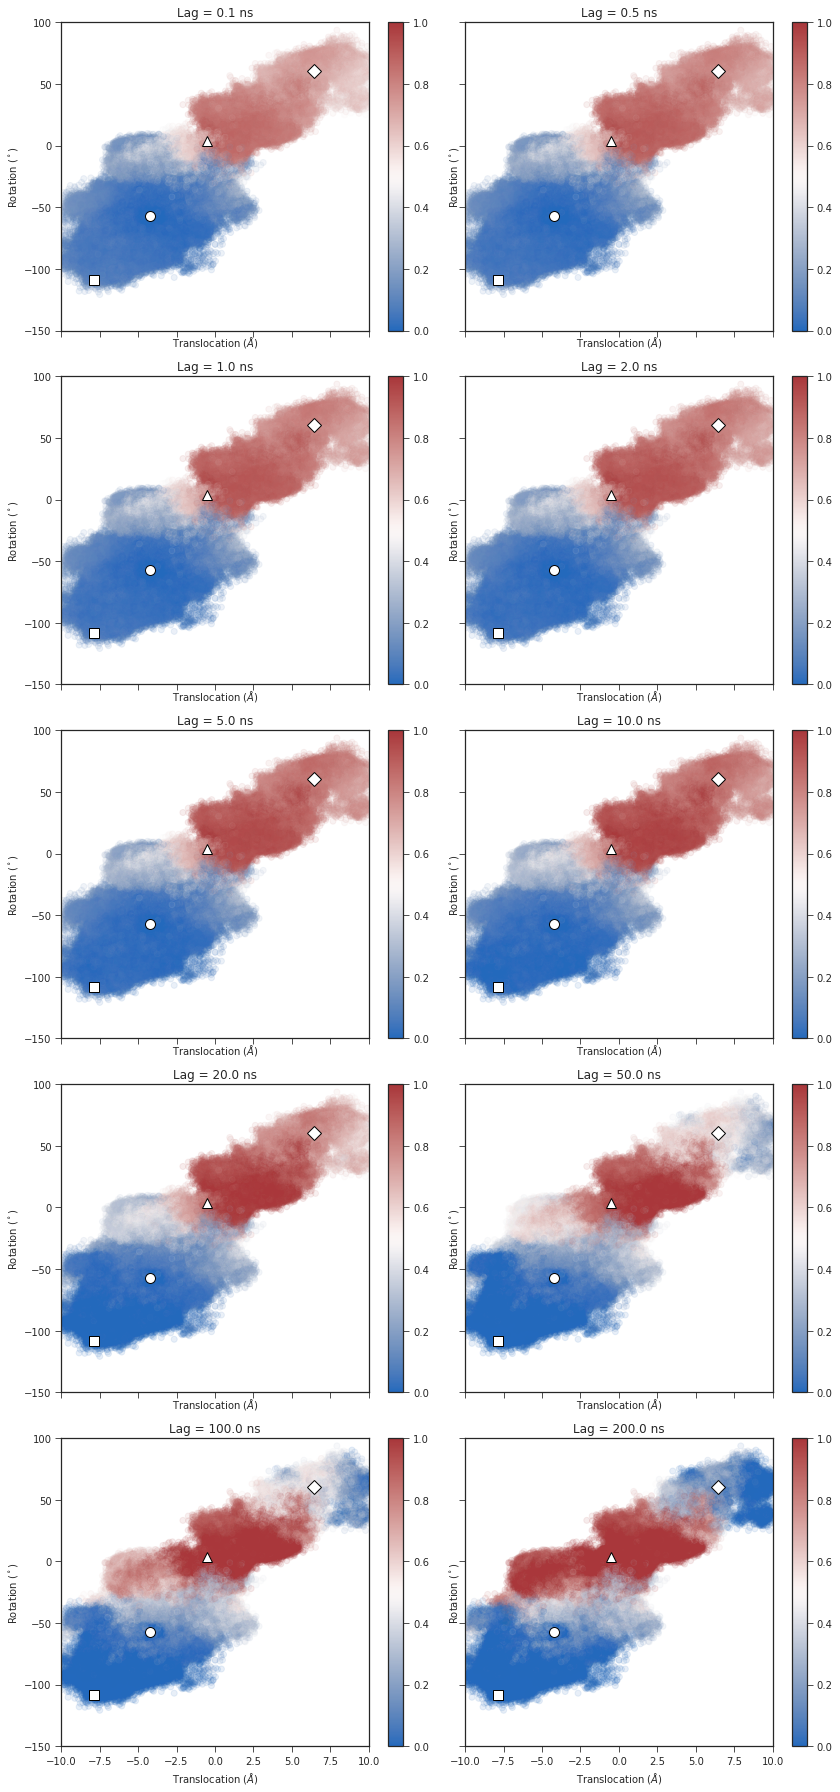

In [79]:
f, axs = plt.subplots(5, 2, figsize=(12, 25), sharex=True, sharey=True)
for lag, q, ax in zip(lags, q_downup, axs.flat):
    q_arr = np.concatenate(q).clip(min=0.0, max=1.0)
    h = ax.scatter(*cv_arr[inds].T, c=q_arr[inds], cmap="vlag", alpha=0.1)
    cbar = plt.colorbar(h, ax=ax)
    cbar.solids.set(alpha=1)
    ax.set_title(f"Lag = {lag * 0.1} ns")
    plotting.format_cvs(ax, centroids=True)

f.tight_layout()

In [80]:
com = np.concatenate(weights[5])
q_arr = np.concatenate(q_downup[5])
q_dens, xe, ye = np.histogram2d(
    cv_arr[:, 0], cv_arr[:, 1], bins=100, density=False, weights=q_arr * com
)
w_dens, _, _ = np.histogram2d(
    cv_arr[:, 0], cv_arr[:, 1], bins=100, density=False, weights=com
)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 1.0, 'lag = 10 ns')

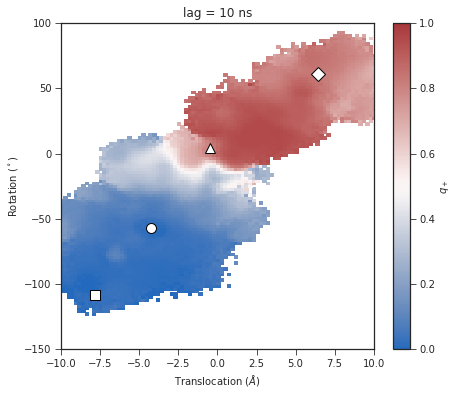

In [81]:
f, ax = plt.subplots(figsize=(7, 6))
h = ax.pcolor(xe, ye, (q_dens / w_dens).T, cmap="vlag", vmin=0, vmax=1)
plt.colorbar(h, ax=ax, label="$q_+$")
plotting.format_cvs(ax, centroids=True)
plt.title("lag = 10 ns")

In [87]:
com = np.concatenate(weights[5])
q_arr = np.concatenate(qb_downup[5])
q_dens, xe, ye = np.histogram2d(
    cv_arr[:, 0], cv_arr[:, 1], bins=100, density=False, weights=q_arr * com
)
w_dens, _, _ = np.histogram2d(
    cv_arr[:, 0], cv_arr[:, 1], bins=100, density=False, weights=com
)

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Text(0.5, 1.0, 'lag = 10 ns')

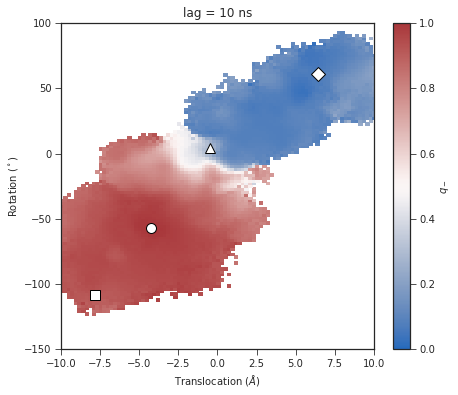

In [88]:
f, ax = plt.subplots(figsize=(7, 6))
h = ax.pcolor(xe, ye, (q_dens / w_dens).T, cmap="vlag", vmin=0, vmax=1)
plt.colorbar(h, ax=ax, label="$q_-$")
plotting.format_cvs(ax, centroids=True)
plt.title("lag = 10 ns")

In [83]:
from itertools import combinations

In [85]:
sb_ids = [42, 48, 47, 53]

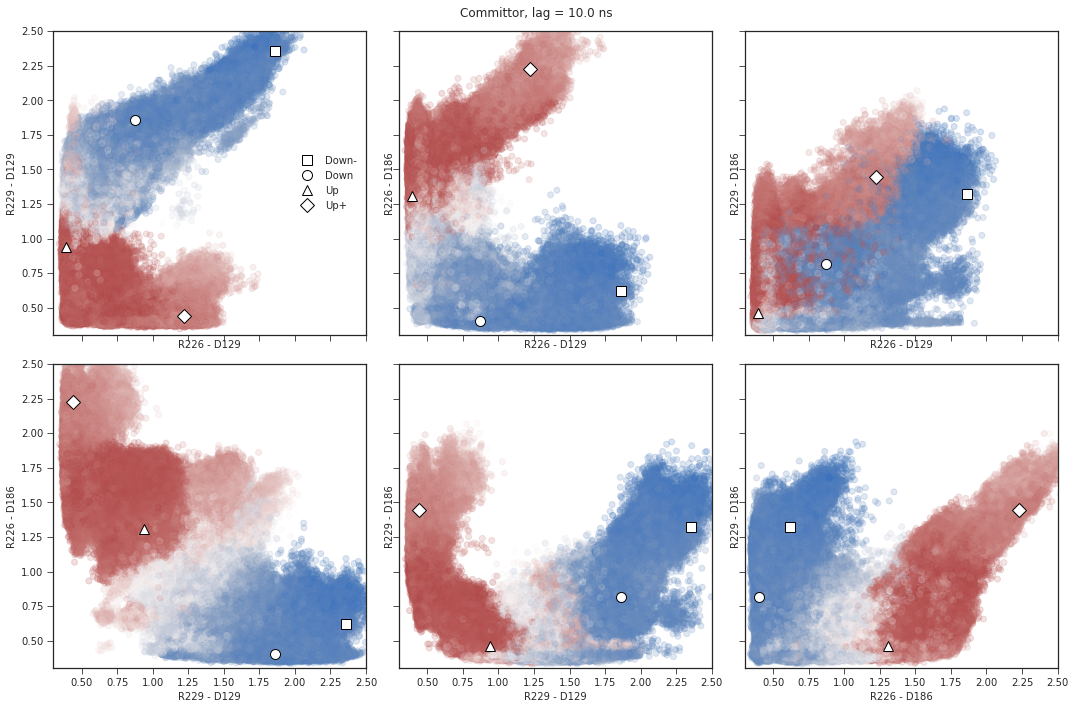

In [86]:
f, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

q_arr = np.concatenate(q_downup[5])
for ((sb1, sb2), ax) in zip(combinations(sb_ids, 2), axes.flat):
    h = ax.scatter(
        sb_arr[inds, sb1], sb_arr[inds, sb2], c=q_arr[inds], cmap="vlag", alpha=0.2
    )
    ax.set(
        xlabel=sb_labels[sb1 - 30],
        ylabel=sb_labels[sb2 - 30],
        xlim=[0.3, 2.5],
        ylim=[0.3, 2.5],
    )
# cbar = f.colorbar(h, ax=axes.ravel().tolist())
# cbar.solids.set(alpha=1)

plotting.plot_sb_models(axes.flat, mode="du", centroids=True)
axes[0][0].legend(["Down-", "Down", "Up", "Up+"], loc="right")

plt.suptitle(f"Committor, lag = {lags[5] * 0.1} ns")
f.tight_layout()

## 3d projections

In [93]:
# %matplotlib notebook
%matplotlib inline

In [91]:
centroids = np.loadtxt("../../models/MD-clustering-center/all.txt")

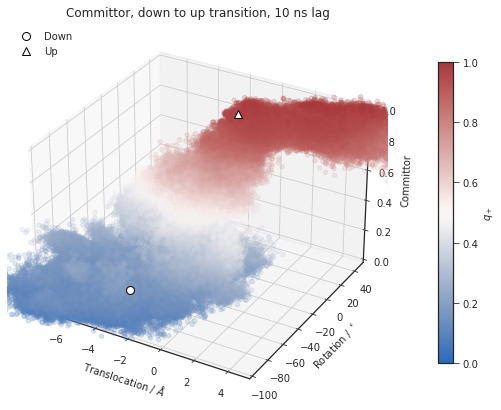

In [94]:
f = plt.figure(figsize=(9, 7))
ax = f.add_subplot(projection="3d")

q = np.concatenate(q_downup[5])
ax.scatter(cv_arr[inds, 0], cv_arr[inds, 1], q[inds], c=q[inds], cmap="vlag", alpha=0.2)
ax.set_xlabel("Translocation / $\AA$")
ax.set_ylabel("Rotation / $^\circ$")
ax.set_zlabel("Committor")
ax.set_xlim([-7.5, 5])
ax.set_ylim([-100, 50])
ax.set_zlim([0, 1.0])
cbar = plt.colorbar(h, ax=ax, pad=0.1, fraction=0.03, label="$q_+$")
cbar.solids.set(alpha=1)
ax.set_title("Committor, down to up transition, 10 ns lag")

ax.plot(centroids[1, 0], centroids[1, 1], 0, "o", mec="k", mfc="w", ms=8)
ax.plot(centroids[2, 0], centroids[2, 1], 1, "^", mec="k", mfc="w", ms=8)
ax.legend(["Down", "Up"], loc="upper left")

In [95]:
feat2_models = np.load("../../data/models_centroids_feat2.npy")

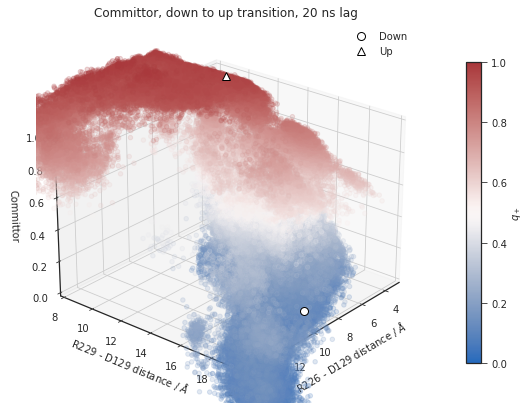

In [98]:
f = plt.figure(figsize=(9, 7))
ax = f.add_subplot(projection="3d")

ax.scatter(
    sb_arr[inds, sb_ids[0]] * 10,
    sb_arr[inds, sb_ids[1]] * 10,
    q[inds],
    c=q[inds],
    cmap="vlag",
    alpha=0.2,
)
ax.set_xlabel(f"{sb_labels[sb_ids[0] - 30]} distance / $\AA$")
ax.set_ylabel(f"{sb_labels[sb_ids[1] - 30]} distance / $\AA$")
ax.set_zlabel("Committor")
ax.set_xlim([3, 15])
ax.set_ylim([8, 20])
ax.set_zlim([0, 1.0])
cbar = plt.colorbar(h, ax=ax, pad=0.1, fraction=0.03, label="$q_+$")
cbar.solids.set(alpha=1)
ax.set_title("Committor, down to up transition, 20 ns lag")

ax.plot(
    feat2_models[1, sb_ids[0]] * 10,
    feat2_models[1, sb_ids[1]] * 10,
    0,
    "o",
    mec="k",
    mfc="w",
    ms=8,
)
ax.plot(
    feat2_models[2, sb_ids[0]] * 10,
    feat2_models[2, sb_ids[1]] * 10,
    1,
    "^",
    mec="k",
    mfc="w",
    ms=8,
)
ax.legend(["Down", "Up"], loc="upper right")

ax.view_init(azim=40, elev=25)

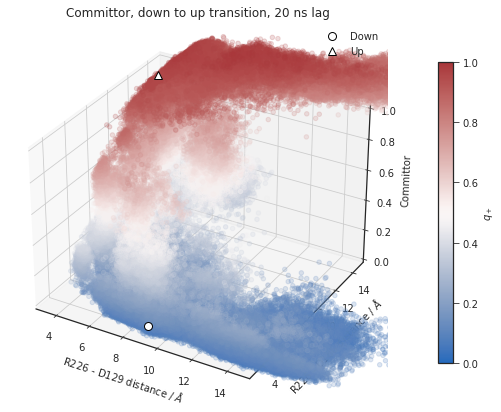

In [100]:
f = plt.figure(figsize=(9, 7))
ax = f.add_subplot(projection="3d")

ax.scatter(
    sb_arr[inds, sb_ids[0]] * 10,
    sb_arr[inds, sb_ids[2]] * 10,
    q[inds],
    c=q[inds],
    cmap="vlag",
    alpha=0.2,
)
ax.set_xlabel(f"{sb_labels[sb_ids[0] - 30]} distance / $\AA$")
ax.set_ylabel(f"{sb_labels[sb_ids[2] - 30]} distance / $\AA$")
ax.set_zlabel("Committor")
ax.set_xlim([3, 15])
ax.set_ylim([3, 15])
ax.set_zlim([0, 1.0])
cbar = plt.colorbar(h, ax=ax, pad=0.1, fraction=0.03, label="$q_+$")
cbar.solids.set(alpha=1)
ax.set_title("Committor, down to up transition, 20 ns lag")

ax.plot(
    feat2_models[1, sb_ids[0]] * 10,
    feat2_models[1, sb_ids[2]] * 10,
    0,
    "o",
    mec="k",
    mfc="w",
    ms=8,
)
ax.plot(
    feat2_models[2, sb_ids[0]] * 10,
    feat2_models[2, sb_ids[2]] * 10,
    1,
    "^",
    mec="k",
    mfc="w",
    ms=8,
)
ax.legend(["Down", "Up"], loc="upper right")

# ax.view_init(azim=40, elev=25)